In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(destiny))
suppressMessages(library(cowplot))

In [2]:
obj.rna <- readRDS("../../../snRNA/from_rico/ct_data/Fib/Fib_states.rds")
obj.rna

An object of class Seurat 
28933 features across 47309 samples within 1 assay 
Active assay: RNA (28933 features, 0 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [3]:
## add annotation for samples
df_sample_annotation <- read.csv("../../../snRNA/metadata/sample_annotation.csv", header = TRUE)
head(df_sample_annotation)

sample_to_region <- df_sample_annotation$region_novel
sample_to_patient <- df_sample_annotation$patient
sample_to_patient_region <- df_sample_annotation$patient_region_id
sample_to_patient_group <- df_sample_annotation$patient_group

names(sample_to_region) <- df_sample_annotation$sample_id
names(sample_to_patient) <- df_sample_annotation$sample_id
names(sample_to_patient_region) <- df_sample_annotation$sample_id
names(sample_to_patient_group) <- df_sample_annotation$sample_id

,sample_id,region_novel,patient,patient_region_id,patient_group
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CK158,control,P1,control_P1,group_1
2,CK162,FZ/GT,P4,FZ/GT_P4,group_3
3,CK165,IZ/BZ,P2,IZ/BZ_P2,group_2
4,CK163,RZ/BZ,P2,RZ/BZ_P2,group_1
5,CK161,IZ,P3,IZ_P3,group_2
6,CK160,RZ/BZ,P3,RZ/BZ_P3,group_1


In [4]:
obj.rna@meta.data$region <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_region)
obj.rna@meta.data$patient <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient)
obj.rna@meta.data$patient_region_id <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient_region)
obj.rna@meta.data$patient_group <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient_group)

In [5]:
df_cell_count <- as.data.frame(obj.rna@meta.data) %>%
    group_by(orig.ident) %>%
    summarise(count = n()) %>%
    arrange(desc(count)) %>%
    subset(count > 400)

df_cell_count

orig.ident,count
<chr>,<int>
CK164,4305
CK358,3103
CK158,3024
CK159,2951
CK160,2665
CK356,2531
CK163,2133
CK367,2122
CK373,2002


In [6]:
obj.rna <- obj.rna %>% 
        NormalizeData() %>%
        FindVariableFeatures() %>%
        ScaleData()

Centering and scaling data matrix



In [7]:
obj.rna

An object of class Seurat 
28933 features across 47309 samples within 1 assay 
Active assay: RNA (28933 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [8]:
table(obj.rna$opt_state)


    0     1     2     3     4 
16369 16215  8913  4640  1172 

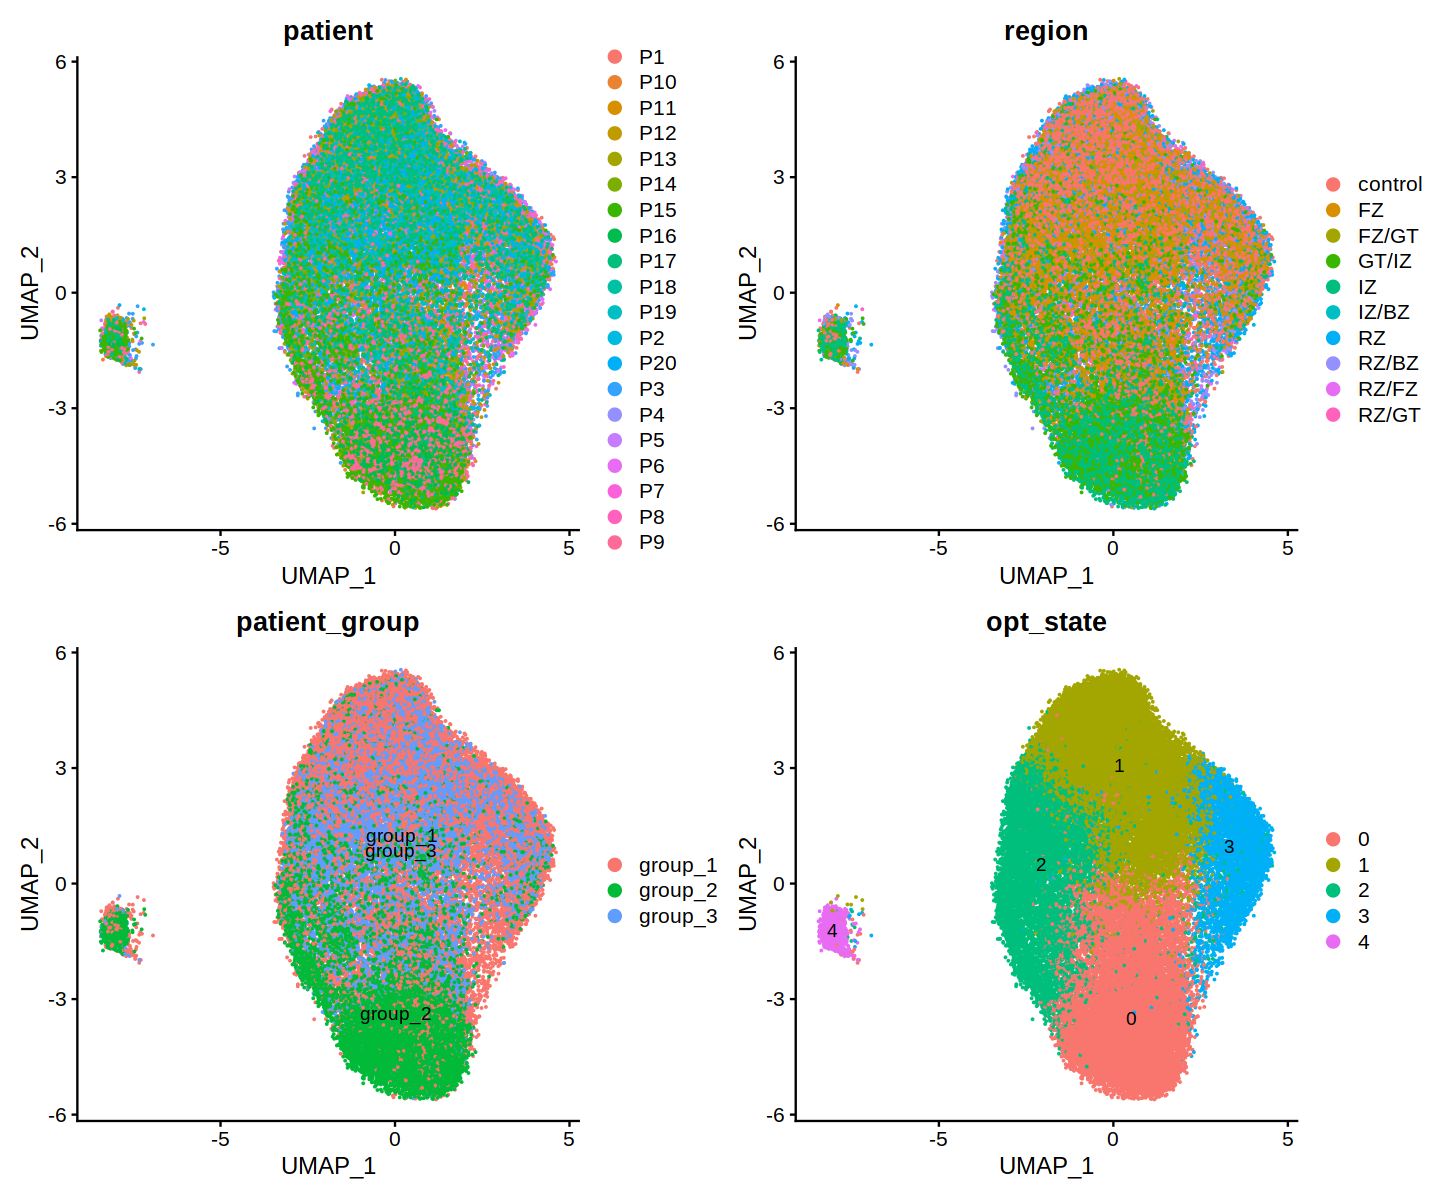

In [9]:
options(repr.plot.height = 10, repr.plot.width = 12)

p1 <- DimPlot(obj.rna, reduction = "umap", group.by = "patient")
p2 <- DimPlot(obj.rna, reduction = "umap", group.by = "region")
p3 <- DimPlot(obj.rna, reduction = "umap", group.by = "patient_group", label = TRUE)
p4 <- DimPlot(obj.rna, reduction = "umap", group.by = "opt_state", label = TRUE)

patchwork::wrap_plots(list(p1, p2, p3, p4), nrow = 2)

In [11]:
df <- obj.rna@meta.data %>%
    group_by(opt_state) %>%
    summarise(ave_double_score = mean(doublet_score))

df

opt_state,ave_double_score
<fct>,<dbl>
0,0.002400318
1,0.002323870
2,0.004655579
3,0.003027283
4,0.030936249


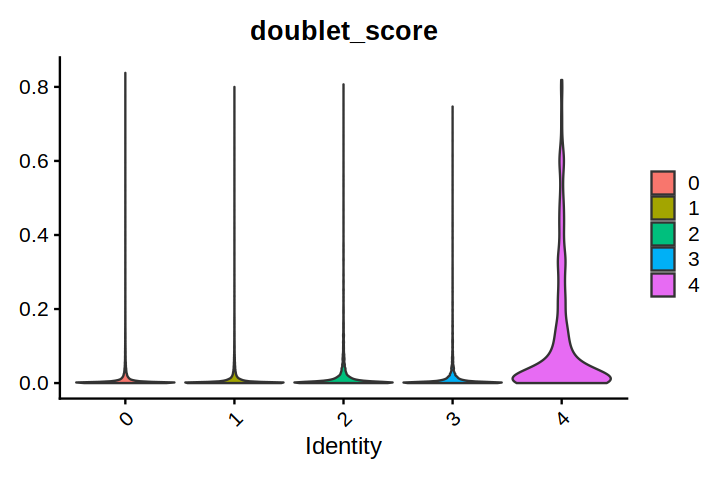

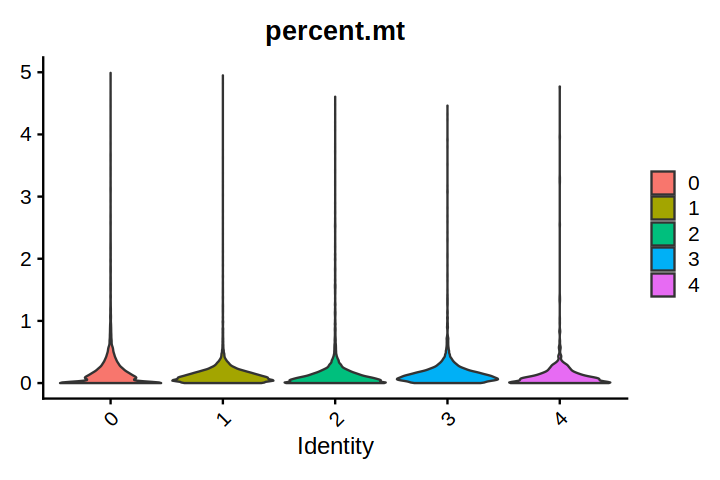

In [8]:
options(repr.plot.height = 4, repr.plot.width = 6)

VlnPlot(obj.rna, features = "doublet_score", group.by = "opt_state", pt.size = 0)
VlnPlot(obj.rna, features = "percent.mt", group.by = "opt_state", pt.size = 0)

In [22]:
# ## remove sample with less than 400 cells
# df_cell_count <- obj.rna@meta.data %>%
#     as.data.frame() %>%
#     group_by(orig.ident) %>%
#     summarise(count = n()) %>%
#     arrange(desc(count)) %>%
#     subset(count > 400)

# df_cell_count


CK158 CK159 CK160 CK161 CK162 CK163 CK164 CK165 CK356 CK357 CK358 CK359 CK360 
 3024  2951  2665    82   714  2133  4305   188  2531  1370  3103  1280  1955 
CK361 CK362 CK363 CK364 CK365 CK366 CK367 CK368 CK369 CK370 CK371 CK372 CK373 
 1776  1147  1427  1608  1108  1554  2122  1394   366  1155  1479   840  2002 
CK374 CK375 CK376 
 1955   660   415 

orig.ident,count
<chr>,<int>
CK164,4305
CK358,3103
CK158,3024
CK159,2951
CK160,2665
CK356,2531
CK163,2133
CK367,2122
CK373,2002


In [9]:
Idents(obj.rna) <- "opt_state"
obj.rna.sub <- subset(obj.rna, idents = "4", invert = TRUE)

In [9]:
table(obj.rna$opt_clust)


    0     1    10    11    12    13    14    15    16     2     3     4     5 
13876 19996   206    46   310     5     3     1    79  6061  3426   444   933 
    6     7     8     9 
  209   896   545   273 

In [10]:
opt_state_cols <- ArchR::paletteDiscrete(obj.rna.sub$opt_state)

In [14]:
obj.rna.sub <- RunUMAP(obj.rna.sub,
                      dims = 1:30, 
                   reduction = 'harmony',
                   reduction.name = "umap",
                   reduction.key = 'umap_',
                  verbose = FALSE,
                   min.dist = 0.4)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [36]:
# cols <- c("control_P1" = "#440154FF", "control_P18" = "#440154FF", 
#           "control_P7" = "#440154FF", "control_P8" = "#440154FF",
#          "FZ_P15" = "#35B779FF", "FZ_P16" = "#35B779FF",
#          "FZ_P17" = "#35B779FF", "FZ/GT_P16" = "#35B779FF",
#          "FZ/GT_P4" = "#35B779FF", "GT/IZ_P10" = "#FDE725FF",
#          "GT/IZ_P14" = "#FDE725FF", "IZ_P11" = "#FDE725FF",
#          "IZ_P16" = "#FDE725FF", "IZ_P17" = "#FDE725FF",
#          "IZ_P3" = "#FDE725FF", "IZ/BZ_P2" = "#FDE725FF",
#          "IZ/GT_P10" = "#FDE725FF", "IZ/GT_P16" = "#FDE725FF",
#          "RZ_P10" = "#31688EFF", "RZ_P12" = "#31688EFF",
#          "RZ_P3" = "#31688EFF", "RZ_P6" = "#31688EFF",
#          "RZ/BZ_P13" = "#31688EFF", "RZ/BZ_P2" = "#31688EFF",
#          "RZ/BZ_P3" = "#31688EFF", "RZ/FZ_P5" = "#31688EFF",
#          "RZ/GT_P9" = "#31688EFF")

In [ ]:
options(repr.plot.height =10, repr.plot.width = 10)

p1 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "patient")
p2 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "region")
p3 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "patient_group", label = TRUE)
p4 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "opt_state", label = TRUE, cols = opt_state_cols)

patchwork::wrap_plots(list(p1, p2, p3, p4), nrow = 2)

`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.



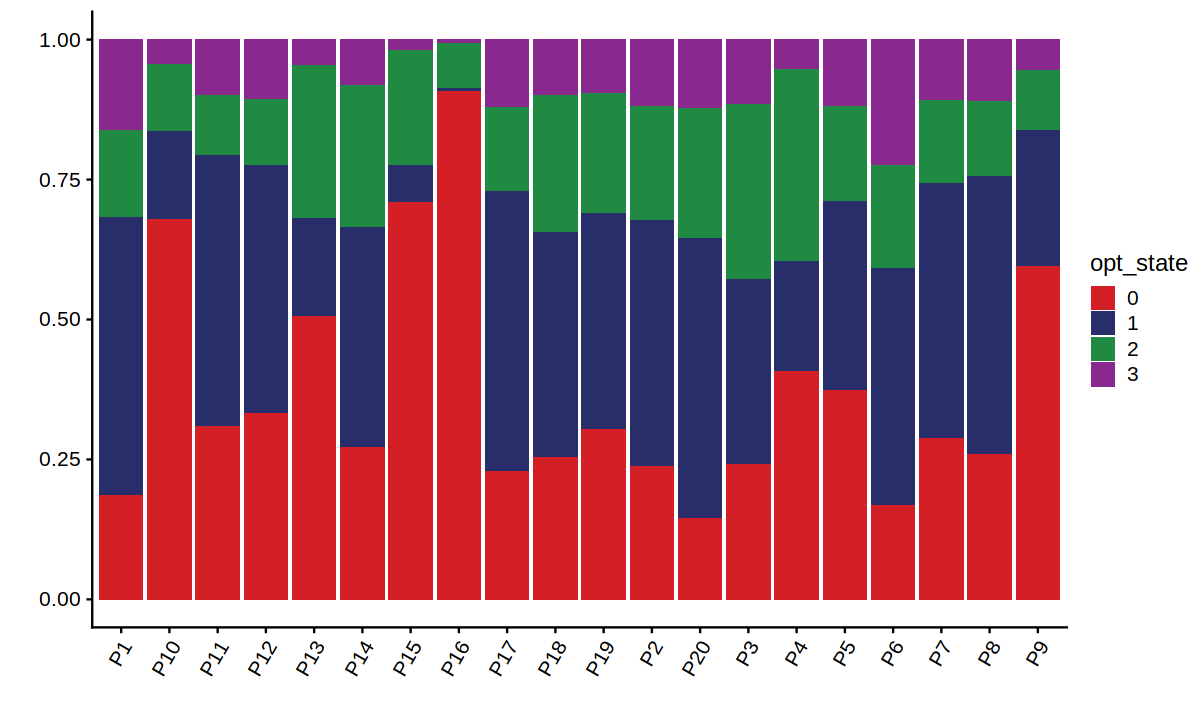

In [17]:
df_ct <- obj.rna.sub@meta.data %>%
    as.data.frame() %>%
    group_by(patient, opt_state) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p <- ggplot(df_ct, aes(patient, cell_proportion, fill=opt_state)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = opt_state_cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))
    

options(repr.plot.width = 10, repr.plot.height = 6)

p

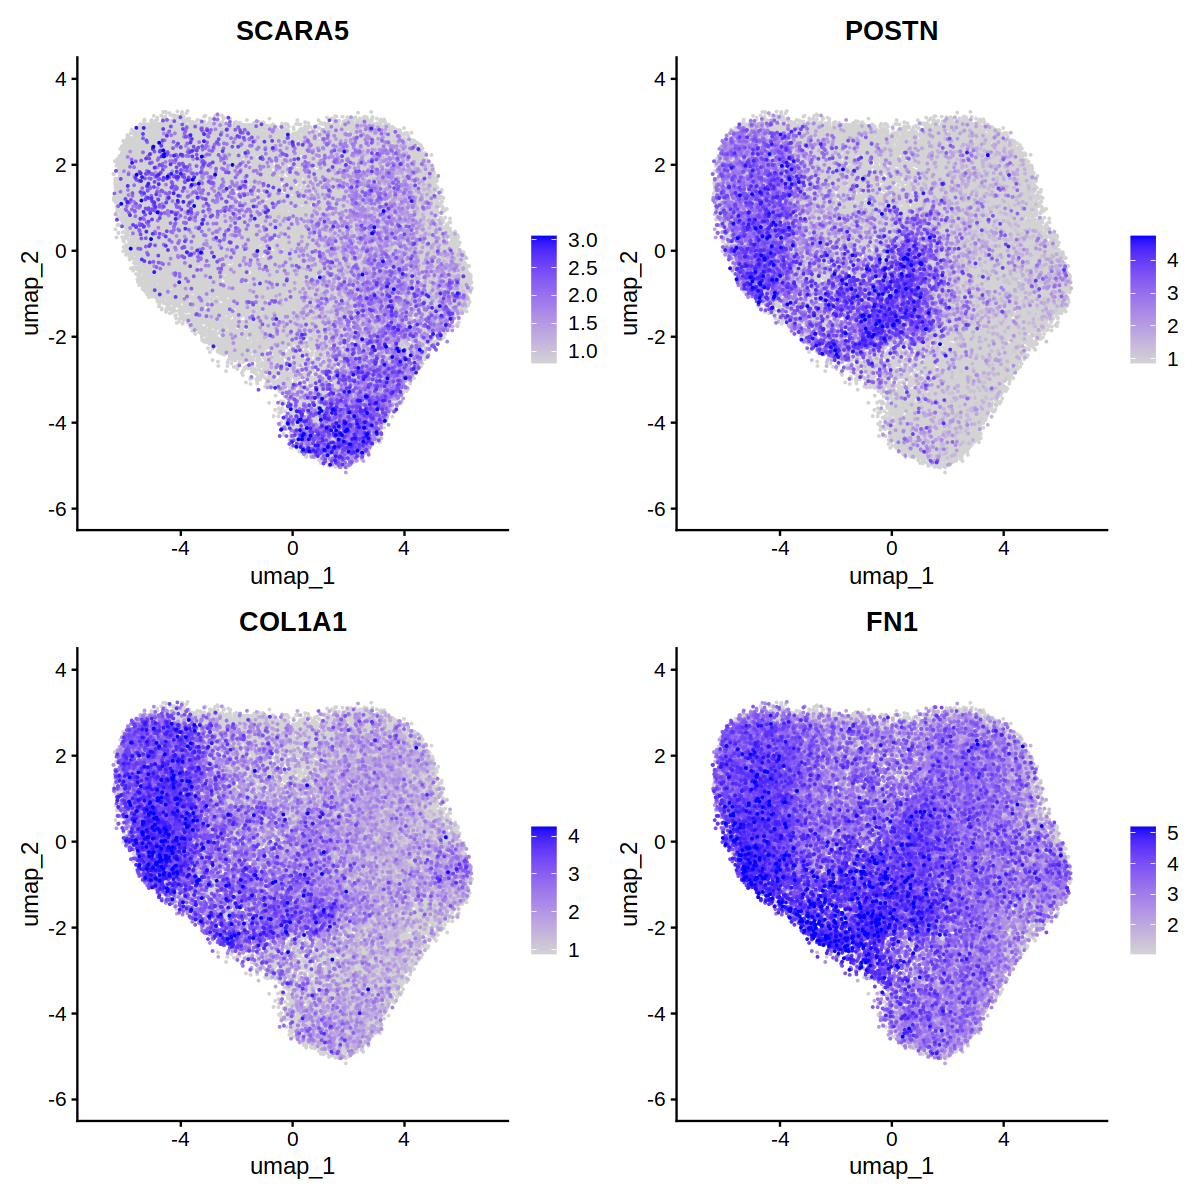

In [18]:
options(repr.plot.height = 10, repr.plot.width = 10)

p1 <- FeaturePlot(obj.rna.sub, reduction = "umap", features = "SCARA5", order = TRUE, min.cutoff = "q1", max.cutoff = "q99")
p2 <- FeaturePlot(obj.rna.sub, reduction = "umap", features = "POSTN", order = TRUE, min.cutoff = "q1", max.cutoff = "q99")
p3 <- FeaturePlot(obj.rna.sub, reduction = "umap", features = "COL1A1", order = TRUE, min.cutoff = "q1", max.cutoff = "q99")
p4 <- FeaturePlot(obj.rna.sub, reduction = "umap", features = "FN1", order = TRUE, min.cutoff = "q1", max.cutoff = "q99")

patchwork::wrap_plots(list(p1, p2, p3, p4), nrow = 2)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



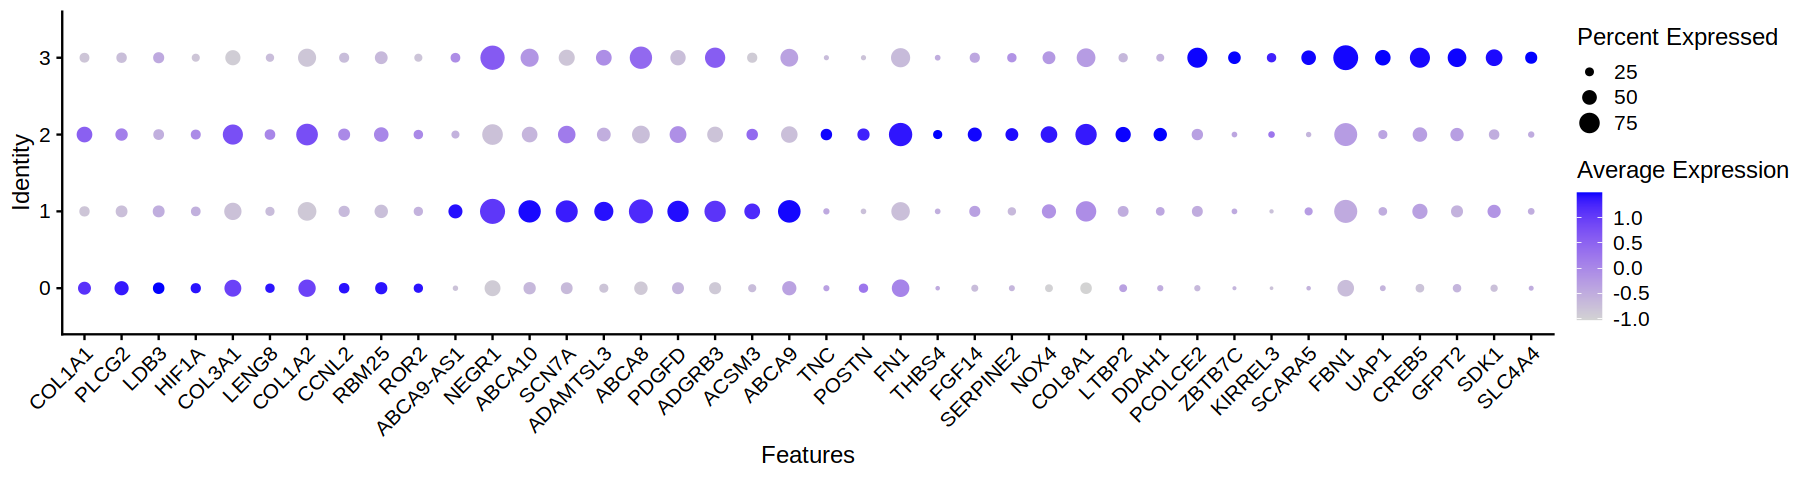

In [27]:
## find marker
Idents(obj.rna.sub) <- "opt_state"

all.markers <- FindAllMarkers(obj.rna.sub, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

df <- all.markers %>%
    group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC)

# Dot plots - the size of the dot corresponds to the percentage of cells expressing the
# feature in each cluster. The color represents the average expression level
options(repr.plot.height = 4, repr.plot.width = 15)
DotPlot(obj.rna.sub, features = df$gene) + RotatedAxis()

if(!dir.exists("../data/snRNA")){
    dir.create("../data/snRNA")
}

markerList <- split(all.markers, all.markers$cluster)

for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$avg_log2FC), ]
}

WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "../data/snRNA/MarkerGenes.xlsx",
                   SheetNames = names(markerList))

saveRDS(all.markers, "../data/snRNA/MarkerGenes.rds")


Attaching package: ‘destiny’


The following object is masked from ‘package:Signac’:

    distance


The following object is masked from ‘package:SummarizedExperiment’:

    distance


The following object is masked from ‘package:GenomicRanges’:

    distance


The following object is masked from ‘package:IRanges’:

    distance




finding knns......done. Time: 802.67s
Calculating transition probabilities......done. Time: 0.42s

performing eigen decomposition......done. Time: 3.96s


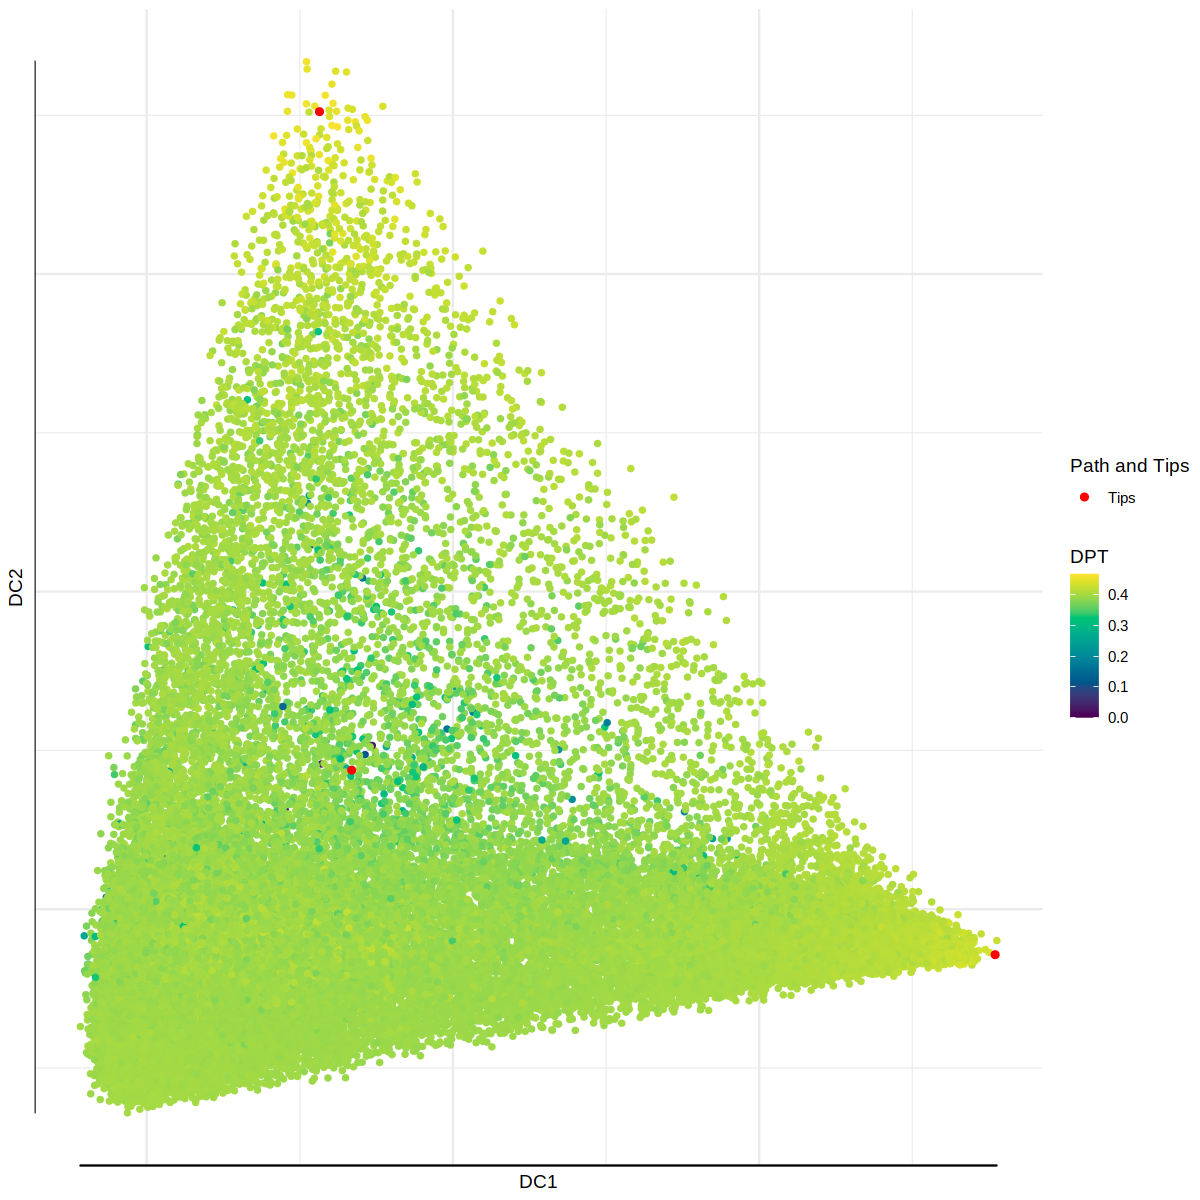

In [17]:
# df <- as.data.frame(obj.rna.sub@reductions$harmony@cell.embeddings)
# data <- as.ExpressionSet(df)
# dm <- DiffusionMap(data,
#                    verbose = TRUE)
# dpt <- DPT(dm)
# plot(dpt)

# embedding <- as.data.frame(dm)[, c("DC1", "DC2")]
# rownames(embedding) <- colnames(obj.rna.sub)
# obj.rna.sub[['dm']] = CreateDimReducObject(embeddings = as.matrix(embedding),
#                                               key = 'DC_',
#                                               assay = 'RNA')
# options(repr.plot.height = 8, repr.plot.width = 8)
# DimPlot(obj.rna.sub, reduction = 'dm', pt.size = 0.5, group.by = "opt_state")

In [ ]:
saveRDS(obj.rna.sub, "../data/snRNA/snRNA.rds")

In [ ]:
sessionInfo()